# Is podium


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


We continue with the validation of the model that predicts the podium


In [2]:
df = pd.read_csv("../assets/data/processed/adding_data.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_score), "neg_mean_absolute_error"]
labels = np.array(["not_podium", "podium"])
podiums = df[df["positionFinal"].isin([1, 2, 3])][
    ["raceYear", "raceRound", "driverRef"]
]
podiums = podiums.groupby(by=["raceYear", "raceRound"]).agg({"driverRef": ",".join})

X = pd.read_csv("../assets/data/processed/adding_data_X.csv")
y = df.merge(podiums, how="left", on=["raceYear", "raceRound"], suffixes=("", "Podium"))
y = y.apply(lambda x: int(x["driverRef"] in x["driverRefPodium"]), axis=1)

## K-Nearest Neighbors


KNeighborsClassifier(metric='cosine', n_neighbors=24, weights='distance'):
CV with make_scorer(balanced_accuracy_score): 0.7429538827062427
CV with neg_mean_absolute_error: -0.11397704298793229
              precision    recall  f1-score   support

  not_podium       0.93      0.94      0.93      4545
      podium       0.61      0.55      0.58       756

    accuracy                           0.89      5301
   macro avg       0.77      0.75      0.76      5301
weighted avg       0.88      0.89      0.88      5301



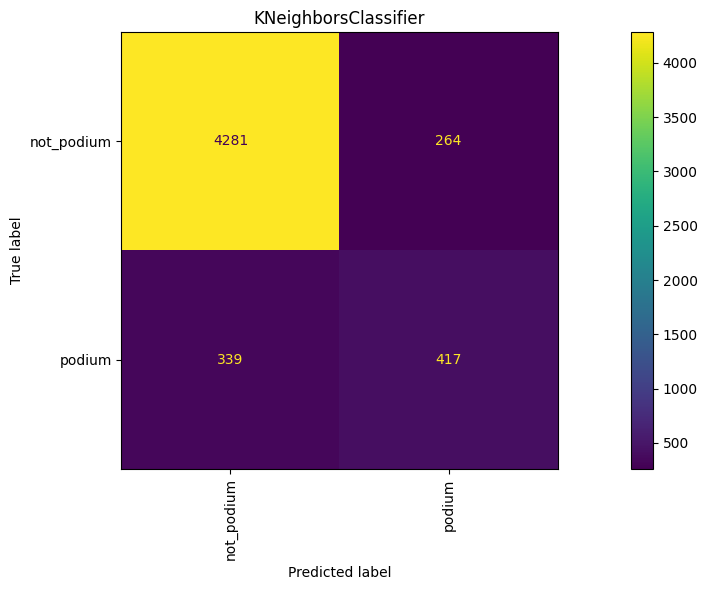

In [3]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorRef",
        "raceYear",
        "driverWins",
        "constructorWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
knn = KNeighborsClassifier(n_neighbors=24, metric="cosine", weights="distance")
model_test((knn,), X_selected, y, tscv, scorers=scorers, labels=labels)

KNeighborsClassifier(metric='cosine', n_neighbors=24, weights='distance'):
CV with make_scorer(balanced_accuracy_score): 0.730290604709784
CV with neg_mean_absolute_error: -0.11516983540363493
              precision    recall  f1-score   support

  not_podium       0.92      0.94      0.93      4545
      podium       0.61      0.52      0.56       756

    accuracy                           0.88      5301
   macro avg       0.77      0.73      0.75      5301
weighted avg       0.88      0.88      0.88      5301



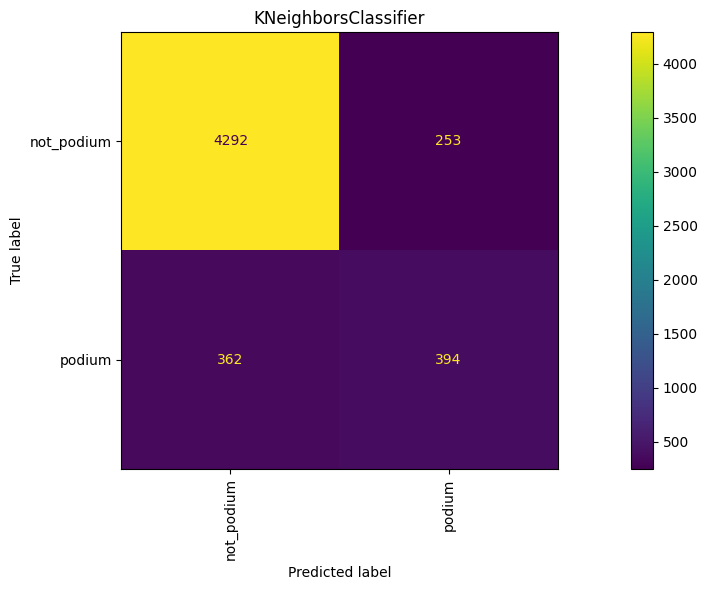

In [4]:
knn = KNeighborsClassifier(n_neighbors=24, metric="cosine", weights="distance")
model_test((knn,), X, y, tscv, scorers=scorers, labels=labels)

## Decision Tree


DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_score): 0.7833310867877756
CV with neg_mean_absolute_error: -0.09928583581861047
              precision    recall  f1-score   support

  not_podium       0.94      0.95      0.94      4545
      podium       0.66      0.62      0.64       756

    accuracy                           0.90      5301
   macro avg       0.80      0.78      0.79      5301
weighted avg       0.90      0.90      0.90      5301



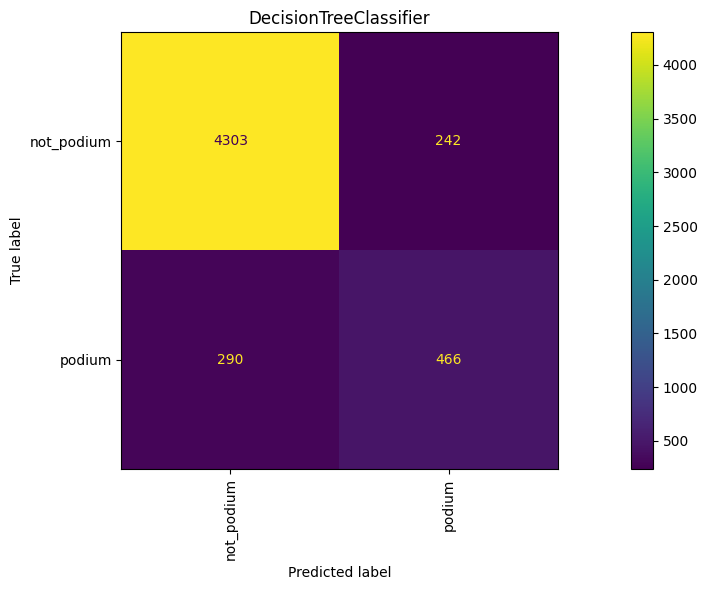

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorRef",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "circuitRef",
        "circuitLocation",
        "circuitCountry",
        "circuitLng",
        "driverWins",
        "constructorWins",
        "q3",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, labels=labels)

DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_score): 0.7837904015823829
CV with neg_mean_absolute_error: -0.1063919902193896
              precision    recall  f1-score   support

  not_podium       0.94      0.94      0.94      4545
      podium       0.62      0.63      0.63       756

    accuracy                           0.89      5301
   macro avg       0.78      0.78      0.78      5301
weighted avg       0.89      0.89      0.89      5301



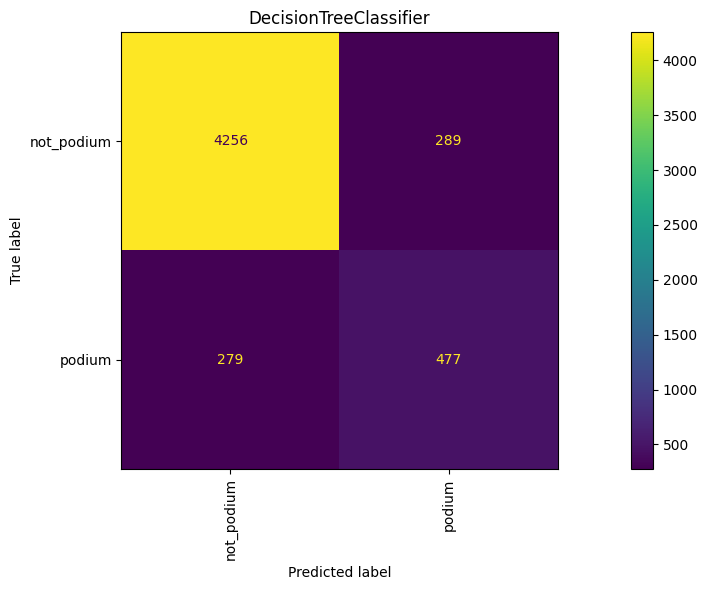

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, labels=labels)

## Random Forest


RandomForestClassifier(criterion='log_loss', max_depth=9, n_estimators=387):


CV with make_scorer(balanced_accuracy_score): 0.7757066575132293
CV with neg_mean_absolute_error: -0.09453824798145284
              precision    recall  f1-score   support

  not_podium       0.93      0.96      0.95      4545
      podium       0.70      0.57      0.63       756

    accuracy                           0.90      5301
   macro avg       0.82      0.76      0.79      5301
weighted avg       0.90      0.90      0.90      5301



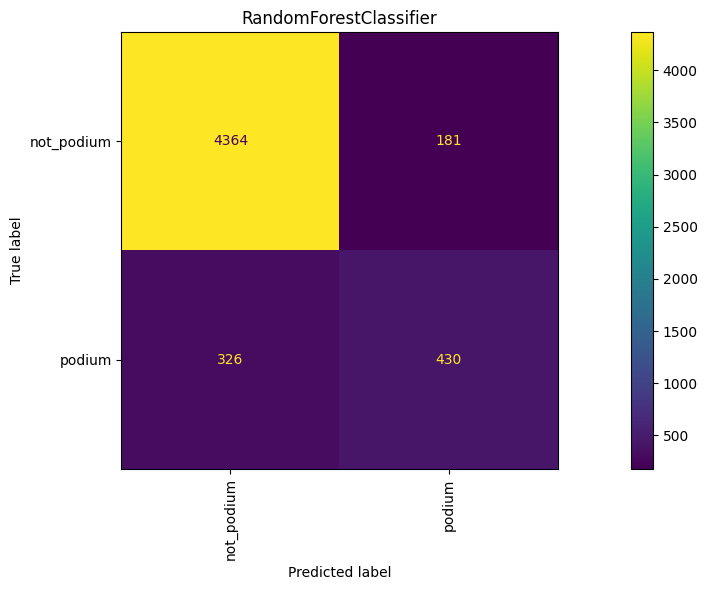

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverNumber",
        "driverNationality",
        "constructorRef",
        "raceYear",
        "driverWins",
        "constructorWins",
        "q1",
        "driverAgeAtRace",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
random_forest = RandomForestClassifier(
    max_depth=9, n_estimators=387, criterion="log_loss"
)
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, labels=labels)

RandomForestClassifier(criterion='log_loss', max_depth=9, n_estimators=387):
CV with make_scorer(balanced_accuracy_score): 0.7606591943694638
CV with neg_mean_absolute_error: -0.09644770027389865
              precision    recall  f1-score   support

  not_podium       0.93      0.96      0.95      4545
      podium       0.71      0.55      0.62       756

    accuracy                           0.90      5301
   macro avg       0.82      0.76      0.78      5301
weighted avg       0.90      0.90      0.90      5301



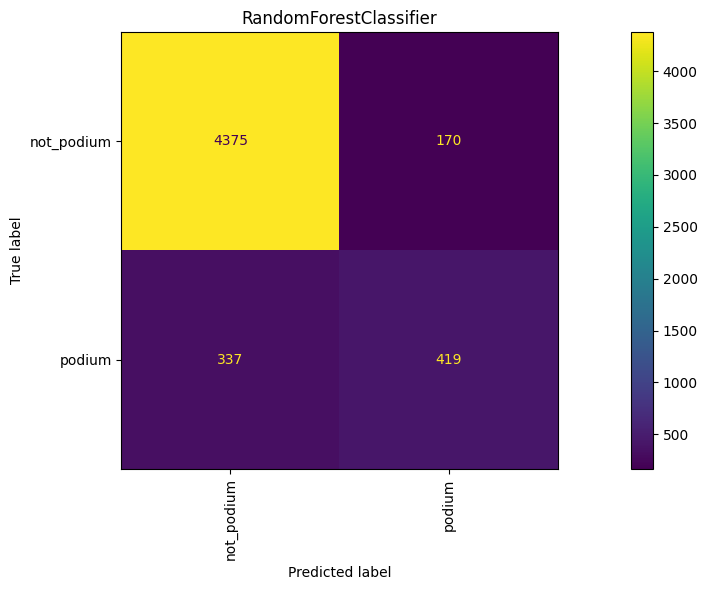

In [8]:
random_forest = RandomForestClassifier(
    max_depth=9, n_estimators=387, criterion="log_loss"
)


model_test((random_forest,), X, y, tscv, scorers=scorers, labels=labels)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(71, 19, 76, 43, 40)):
CV with make_scorer(balanced_accuracy_score): 0.7909628012014219
CV with neg_mean_absolute_error: -0.11782663273802381
              precision    recall  f1-score   support

  not_podium       0.94      0.92      0.93      4545
      podium       0.58      0.65      0.61       756

    accuracy                           0.88      5301
   macro avg       0.76      0.79      0.77      5301
weighted avg       0.89      0.88      0.89      5301



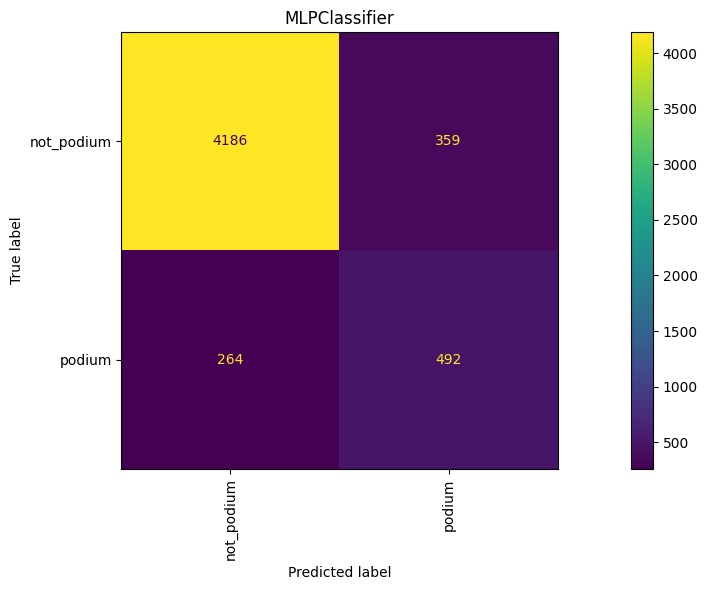

In [9]:
X_selected = X[
    [
        "positionGrid",
        "raceYear",
        "grandPrix",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "q1",
        "q2",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(71, 19, 76, 43, 40))
model_test((nn,), X_selected, y, tscv, scorers=scorers, labels=labels)

MLPClassifier(activation='logistic', hidden_layer_sizes=(71, 19, 76, 43, 40)):


CV with make_scorer(balanced_accuracy_score): 0.77725892684011
CV with neg_mean_absolute_error: -0.1297477882770666
              precision    recall  f1-score   support

  not_podium       0.94      0.91      0.92      4545
      podium       0.54      0.64      0.59       756

    accuracy                           0.87      5301
   macro avg       0.74      0.78      0.75      5301
weighted avg       0.88      0.87      0.87      5301



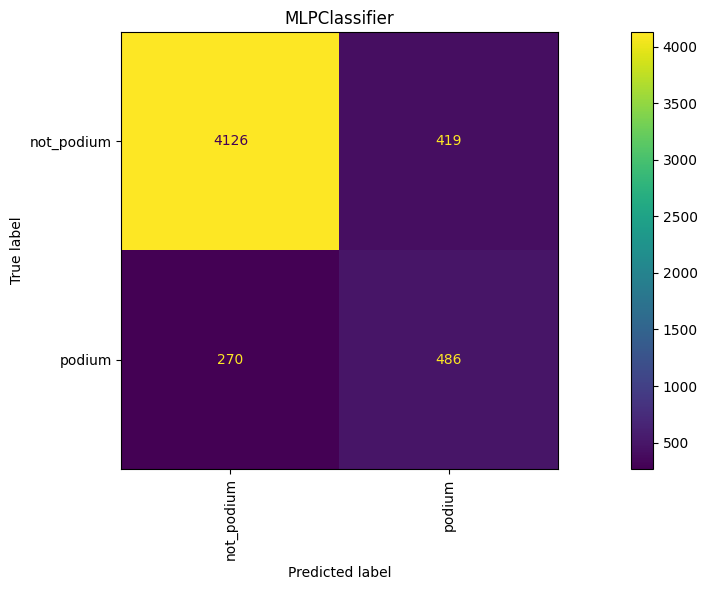

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(71, 19, 76, 43, 40))
model_test((nn,), X, y, tscv, scorers=scorers, labels=labels)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

In this case, performance has not been improved.
